In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
import pickle

In [ ]:
dataset = pd.read_csv("/content/T_and_R_dataset.csv")
dataset.head()

,message to examine,label (depression result)
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


<ipython-input-3-93e49460278f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


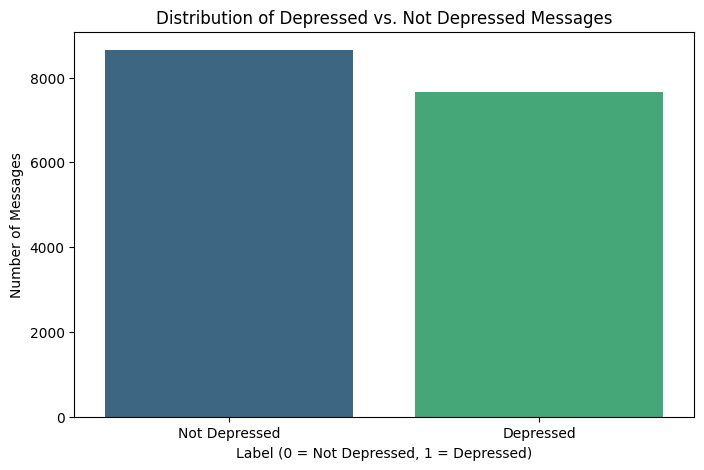

In [ ]:
label_counts = dataset['label (depression result)'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')

plt.xlabel('Label (0 = Not Depressed, 1 = Depressed)')
plt.ylabel('Number of Messages')
plt.title('Distribution of Depressed vs. Not Depressed Messages')
plt.xticks([0, 1], ['Not Depressed', 'Depressed'])
plt.show()

In [ ]:
missing_values = dataset.isnull()
print(missing_values)

       message to examine  label (depression result)
0                   False                      False
1                   False                      False
2                   False                      False
3                   False                      False
4                   False                      False
...                   ...                        ...
16314               False                      False
16315               False                      False
16316               False                      False
16317               False                      False
16318               False                      False

[16319 rows x 2 columns]


In [ ]:
missing_value_count = dataset.isna().sum()
print(missing_value_count)

message to examine           0
label (depression result)    0
dtype: int64


In [ ]:
duplicate_values = dataset.duplicated()
print(dataset[duplicate_values])

                                      message to examine  \
4325                              Good morning everyone    
5220   Ok I REALLY need to go to bed and stop playing...   
5235                                       Good morning    
6623                                       Good morning    
8226   Should Mothers Avoid Nighttime Breastfeeding t...   
8752   Mom's depression tied to kids' emotional, inte...   
8753   Mom's depression tied to kids' emotional, inte...   
8766   Mom's depression tied to kids' emotional, inte...   
8768   Mom's depression tied to kids' emotional, inte...   
8769   Mom's depression tied to kids' emotional, inte...   
8770   Mom's depression tied to kids' emotional, inte...   
8771   Mom's depression tied to kids' emotional, inte...   
8772   Mom's depression tied to kids' emotional, inte...   
8773   Mom's depression tied to kids' emotional, inte...   
8777   Mom's depression tied to kids' emotional, inte...   
9120   Don't settle with #depression, #a

In [ ]:
dataset = dataset.drop_duplicates()

duplicate_values = dataset.duplicated()
print(dataset[duplicate_values])

Empty DataFrame
Columns: [message to examine, label (depression result)]
Index: []


In [ ]:
import re
import string
from bs4 import BeautifulSoup

In [ ]:
def cleanText(text):
  text = text.lower()
  text = re.sub(r'\d+', '', text)
  text = re.sub(r'<Emoji:.*?>', '', text)
  text = re.sub(r'http\S+|www\S+', '', text)
  text = text.translate(str.maketrans('','',string.punctuation))
  text = re.sub(r'\W',' ',text)
  text = BeautifulSoup(text, "html.parser").get_text()
  text = re.sub(r'\s+', ' ', text)
  text = text.strip()
  return text

In [ ]:
dataset['message to examine'] = dataset['message to examine'].apply(cleanText)

In [ ]:
dataset['message to examine'].head()

,message to examine
0,just had a real good moment i missssssssss him...
1,is reading manga
2,comeagainjen
3,lapcat need to send em to my accountant tomorr...
4,add me on myspace myspacecomlookthunder


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
dataset['processed_messages'] = dataset['message to examine'].apply(word_tokenize)

In [ ]:
dataset["processed_messages"].head()

,processed_messages
0,"[just, had, a, real, good, moment, i, missssss..."
1,"[is, reading, manga]"
2,[comeagainjen]
3,"[lapcat, need, to, send, em, to, my, accountan..."
4,"[add, me, on, myspace, myspacecomlookthunder]"


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
dataset["processed_messages"] = dataset['processed_messages'].apply(
    lambda x: [i for i in x if i not in stop_words]
)

In [ ]:
dataset.tail(10)

,message to examine,label (depression result),processed_messages
16309,i don t want your pity,1,"[want, pity]"
16310,why do people come on this forum to brag about...,1,"[people, come, forum, brag, life, getting, bet..."
16311,what s wrong with me it s me against the world...,1,"[wrong, world, losing, pretty, badly, wonder, ..."
16312,having trouble sticking with it feels like i m...,1,"[trouble, sticking, feels, like, running, road..."
16313,i dont have much that brings fulfillment to my...,1,"[dont, much, brings, fulfillment, life, hobbie..."
16314,whats even the point removed,1,"[whats, even, point, removed]"
16315,i just want everyone to know that their not al...,1,"[want, everyone, know, alone, appreciate, plat..."
16316,i hope i get the coronavirus i hope i get the ...,1,"[hope, get, coronavirus, hope, get, coronaviru..."
16317,sometimes i really wonder if being less ugly w...,1,"[sometimes, really, wonder, less, ugly, would,..."
16318,march break sucks its the same thing every yea...,1,"[march, break, sucks, thing, every, year, good..."


In [ ]:
dataset.tail()

,message to examine,label (depression result),processed_messages
16314,whats even the point removed,1,"[whats, even, point, removed]"
16315,i just want everyone to know that their not al...,1,"[want, everyone, know, alone, appreciate, plat..."
16316,i hope i get the coronavirus i hope i get the ...,1,"[hope, get, coronavirus, hope, get, coronaviru..."
16317,sometimes i really wonder if being less ugly w...,1,"[sometimes, really, wonder, less, ugly, would,..."
16318,march break sucks its the same thing every yea...,1,"[march, break, sucks, thing, every, year, good..."


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
dataset["processed_messages"] = dataset['processed_messages'].apply(
    lambda x: [lemmatizer.lemmatize(i) for i in x]
)

In [ ]:
dataset["processed_messages"].tail(10)

,processed_messages
16309,"[want, pity]"
16310,"[people, come, forum, brag, life, getting, bet..."
16311,"[wrong, world, losing, pretty, badly, wonder, ..."
16312,"[trouble, sticking, feel, like, running, road,..."
16313,"[dont, much, brings, fulfillment, life, hobby,..."
16314,"[whats, even, point, removed]"
16315,"[want, everyone, know, alone, appreciate, plat..."
16316,"[hope, get, coronavirus, hope, get, coronaviru..."
16317,"[sometimes, really, wonder, less, ugly, would,..."
16318,"[march, break, suck, thing, every, year, good,..."


In [ ]:
import ast
import spacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
def safe_convert(text):
    if isinstance(text, list):  # Already a list
        return text
    elif isinstance(text, str):  # Convert from string (e.g., "[‘word1’, ‘word2’]")
        try:
            return ast.literal_eval(text)  # Safer than eval()
        except (ValueError, SyntaxError):  # If conversion fails, return empty list
            return []
    else:
        return []  # Handle None or NaN cases

In [ ]:
dataset["processed_messages_str"] = dataset["processed_messages"].apply(safe_convert)

In [ ]:
dataset["processed_messages_str"] = dataset["processed_messages_str"].apply(lambda x: " ".join(x) if isinstance(x, list) else "")

In [ ]:
docs = list(nlp.pipe(dataset["processed_messages_str"]))

In [ ]:
dataset["POS_tags"] = [[(token.text, token.pos_) for token in doc] for doc in docs]

In [ ]:
print(dataset[["processed_messages_str", "POS_tags"]].head())

                              processed_messages_str  \
0                 real good moment missssssssss much   
1                                      reading manga   
2                                       comeagainjen   
3  lapcat need send em accountant tomorrow oddly ...   
4                  add myspace myspacecomlookthunder   

                                            POS_tags  
0  [(real, ADV), (good, ADJ), (moment, NOUN), (mi...  
1                    [(reading, VERB), (manga, ADV)]  
2                             [(comeagainjen, NOUN)]  
3  [(lapcat, NOUN), (need, NOUN), (send, VERB), (...  
4  [(add, VERB), (myspace, NOUN), (myspacecomlook...  


In [ ]:
dataset[["POS_tags","label (depression result)"]]

,POS_tags,label (depression result)
0,"[(real, ADV), (good, ADJ), (moment, NOUN), (mi...",0
1,"[(reading, VERB), (manga, ADV)]",0
2,"[(comeagainjen, NOUN)]",0
3,"[(lapcat, NOUN), (need, NOUN), (send, VERB), (...",0
4,"[(add, VERB), (myspace, NOUN), (myspacecomlook...",0
...,...,...
16314,"[(what, PRON), (s, AUX), (even, ADV), (point, ...",1
16315,"[(want, VERB), (everyone, PRON), (know, VERB),...",1
16316,"[(hope, PROPN), (get, VERB), (coronavirus, PRO...",1
16317,"[(sometimes, ADV), (really, ADV), (wonder, VER...",1


In [ ]:
def calculate_pos_percentages(data):
    processed_data = []

    # Convert POS_tags from string to list of tuples if necessary
    for row in data.itertuples(index=False):
        sentence, label = row  # Correctly unpacking using .itertuples()
        if isinstance(sentence, str):  # Check if POS_tags is a string
            sentence = ast.literal_eval(sentence)  # Convert string to list of tuples
        processed_data.append((sentence, label))

    # Separate data based on label
    pos_tags_pe = [tag for sentence, label in processed_data if label == 1 for _, tag in sentence]
    pos_tags_ne = [tag for sentence, label in processed_data if label == 0 for _, tag in sentence]

    # Count occurrences
    pos_counts_pe = Counter(pos_tags_pe)
    pos_counts_ne = Counter(pos_tags_ne)

    total_words_pe = sum(pos_counts_pe.values()) or 1  # Avoid division by zero
    total_words_ne = sum(pos_counts_ne.values()) or 1

    # Calculate percentages
    pos_percentages_pe = {pos: (count / total_words_pe) * 100 for pos, count in pos_counts_pe.items()}
    pos_percentages_ne = {pos: (count / total_words_ne) * 100 for pos, count in pos_counts_ne.items()}

    # Merge data into a DataFrame
    all_pos_tags = set(pos_percentages_pe.keys()).union(set(pos_percentages_ne.keys()))
    pos_df = pd.DataFrame({
        "Part of Speech": list(all_pos_tags),
        "PE %": [pos_percentages_pe.get(pos, 0) for pos in all_pos_tags],
        "NE %": [pos_percentages_ne.get(pos, 0) for pos in all_pos_tags]
    })

    return pos_df.sort_values(by="Part of Speech")

In [ ]:
pos_result =  calculate_pos_percentages(dataset[["POS_tags","label (depression result)"]])

In [ ]:
display(pos_result)

,Part of Speech,PE %,NE %
7,ADJ,12.964419,12.261411
9,ADP,1.689950,1.454357
0,ADV,9.493672,7.783541
12,AUX,4.942616,4.136929
1,CCONJ,0.122304,0.094744
8,DET,0.377709,0.318811
13,INTJ,0.815045,1.499308
14,NOUN,31.385552,31.780775
2,NUM,0.781945,0.676349
15,PART,2.224471,1.818119


In [ ]:
dataset = dataset.reset_index()

In [ ]:
def extract_morph_features(pos_tags):
    categories = {"NOUN": 0, "PRON": 0, "ADV": 0, "ADJ": 0, "VERB": 0, "CONJ": 0, "DET": 0}  # 'DET' includes articles
    total_words = len(pos_tags)

    if total_words > 0:
        for _, tag in pos_tags:
            if tag in categories:
                categories[tag] += 1

        for key in categories:
            categories[key] /= total_words

    return categories

In [ ]:
morph_features = dataset["POS_tags"].apply(extract_morph_features).apply(pd.Series)

In [ ]:
dataset = pd.concat([dataset,morph_features], axis=1)

In [ ]:
dataset.head()

,index,message to examine,label (depression result),processed_messages,processed_messages_str,POS_tags,NOUN,PRON,ADV,ADJ,VERB,CONJ,DET
0,0,just had a real good moment i missssssssss him...,0,"[real, good, moment, missssssssss, much]",real good moment missssssssss much,"[(real, ADV), (good, ADJ), (moment, NOUN), (mi...",0.200000,0.000000,0.4,0.2,0.200000,0.0,0.0
1,1,is reading manga,0,"[reading, manga]",reading manga,"[(reading, VERB), (manga, ADV)]",0.000000,0.000000,0.5,0.0,0.500000,0.0,0.0
2,2,comeagainjen,0,[comeagainjen],comeagainjen,"[(comeagainjen, NOUN)]",1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
3,3,lapcat need to send em to my accountant tomorr...,0,"[lapcat, need, send, em, accountant, tomorrow,...",lapcat need send em accountant tomorrow oddly ...,"[(lapcat, NOUN), (need, NOUN), (send, VERB), (...",0.400000,0.066667,0.2,0.0,0.200000,0.0,0.0
4,4,add me on myspace myspacecomlookthunder,0,"[add, myspace, myspacecomlookthunder]",add myspace myspacecomlookthunder,"[(add, VERB), (myspace, NOUN), (myspacecomlook...",0.666667,0.000000,0.0,0.0,0.333333,0.0,0.0


In [ ]:
def compute_stylometric_features(texts):
    word_counts = []
    sentence_counts = []
    words_per_sentence = []

    for text in texts:
        doc = nlp(text)
        words = [token.text for token in doc if not token.is_punct and not token.is_space]
        sentences = list(doc.sents)

        word_counts.append(len(words))  # Total words in message
        sentence_counts.append(len(sentences))  # Total sentences in message
        words_per_sentence.append(
            np.mean([len(sent.text.split()) for sent in sentences]) if sentences else 0
        )

    return word_counts, sentence_counts, words_per_sentence

In [ ]:
word_counts, sentence_counts, words_per_sentence = compute_stylometric_features(dataset["processed_messages_str"])

In [ ]:
stylometric_df = pd.DataFrame({
    "Total Words": word_counts,
    "Total Sentences": sentence_counts,
    "Words per Sentence": words_per_sentence
})

In [ ]:
print(stylometric_df)

       Total Words  Total Sentences  Words per Sentence
0                5                1                 5.0
1                2                1                 2.0
2                1                1                 1.0
3               15                1                14.0
4                3                1                 3.0
...            ...              ...                 ...
16283            5                1                 4.0
16284          112                2                51.5
16285           11                1                10.0
16286            7                1                 7.0
16287           36                1                36.0

[16288 rows x 3 columns]


In [ ]:
dataset

,index,message to examine,label (depression result),processed_messages,processed_messages_str,POS_tags,NOUN,PRON,ADV,ADJ,VERB,CONJ,DET
0,0,just had a real good moment i missssssssss him...,0,"[real, good, moment, missssssssss, much]",real good moment missssssssss much,"[(real, ADV), (good, ADJ), (moment, NOUN), (mi...",0.200000,0.000000,0.400000,0.200000,0.200000,0.0,0.000000
1,1,is reading manga,0,"[reading, manga]",reading manga,"[(reading, VERB), (manga, ADV)]",0.000000,0.000000,0.500000,0.000000,0.500000,0.0,0.000000
2,2,comeagainjen,0,[comeagainjen],comeagainjen,"[(comeagainjen, NOUN)]",1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,3,lapcat need to send em to my accountant tomorr...,0,"[lapcat, need, send, em, accountant, tomorrow,...",lapcat need send em accountant tomorrow oddly ...,"[(lapcat, NOUN), (need, NOUN), (send, VERB), (...",0.400000,0.066667,0.200000,0.000000,0.200000,0.0,0.000000
4,4,add me on myspace myspacecomlookthunder,0,"[add, myspace, myspacecomlookthunder]",add myspace myspacecomlookthunder,"[(add, VERB), (myspace, NOUN), (myspacecomlook...",0.666667,0.000000,0.000000,0.000000,0.333333,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16283,16314,whats even the point removed,1,"[whats, even, point, removed]",whats even point removed,"[(what, PRON), (s, AUX), (even, ADV), (point, ...",0.200000,0.200000,0.200000,0.000000,0.200000,0.0,0.000000
16284,16315,i just want everyone to know that their not al...,1,"[want, everyone, know, alone, appreciate, plat...",want everyone know alone appreciate platform s...,"[(want, VERB), (everyone, PRON), (know, VERB),...",0.366071,0.062500,0.053571,0.133929,0.294643,0.0,0.008929
16285,16316,i hope i get the coronavirus i hope i get the ...,1,"[hope, get, coronavirus, hope, get, coronaviru...",hope get coronavirus hope get coronavirus dont...,"[(hope, PROPN), (get, VERB), (coronavirus, PRO...",0.363636,0.000000,0.000000,0.000000,0.272727,0.0,0.000000
16286,16317,sometimes i really wonder if being less ugly w...,1,"[sometimes, really, wonder, less, ugly, would,...",sometimes really wonder less ugly would help,"[(sometimes, ADV), (really, ADV), (wonder, VER...",0.000000,0.000000,0.428571,0.142857,0.285714,0.0,0.000000


In [ ]:
dataset = dataset.drop(columns="index")

In [ ]:
dataset = pd.concat([dataset, stylometric_df], axis=1)

In [ ]:
dataset

,message to examine,label (depression result),processed_messages,processed_messages_str,POS_tags,NOUN,PRON,ADV,ADJ,VERB,CONJ,DET,Total Words,Total Sentences,Words per Sentence
0,just had a real good moment i missssssssss him...,0,"[real, good, moment, missssssssss, much]",real good moment missssssssss much,"[(real, ADV), (good, ADJ), (moment, NOUN), (mi...",0.200000,0.000000,0.400000,0.200000,0.200000,0.0,0.000000,5,1,5.0
1,is reading manga,0,"[reading, manga]",reading manga,"[(reading, VERB), (manga, ADV)]",0.000000,0.000000,0.500000,0.000000,0.500000,0.0,0.000000,2,1,2.0
2,comeagainjen,0,[comeagainjen],comeagainjen,"[(comeagainjen, NOUN)]",1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1,1,1.0
3,lapcat need to send em to my accountant tomorr...,0,"[lapcat, need, send, em, accountant, tomorrow,...",lapcat need send em accountant tomorrow oddly ...,"[(lapcat, NOUN), (need, NOUN), (send, VERB), (...",0.400000,0.066667,0.200000,0.000000,0.200000,0.0,0.000000,15,1,14.0
4,add me on myspace myspacecomlookthunder,0,"[add, myspace, myspacecomlookthunder]",add myspace myspacecomlookthunder,"[(add, VERB), (myspace, NOUN), (myspacecomlook...",0.666667,0.000000,0.000000,0.000000,0.333333,0.0,0.000000,3,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16283,whats even the point removed,1,"[whats, even, point, removed]",whats even point removed,"[(what, PRON), (s, AUX), (even, ADV), (point, ...",0.200000,0.200000,0.200000,0.000000,0.200000,0.0,0.000000,5,1,4.0
16284,i just want everyone to know that their not al...,1,"[want, everyone, know, alone, appreciate, plat...",want everyone know alone appreciate platform s...,"[(want, VERB), (everyone, PRON), (know, VERB),...",0.366071,0.062500,0.053571,0.133929,0.294643,0.0,0.008929,112,2,51.5
16285,i hope i get the coronavirus i hope i get the ...,1,"[hope, get, coronavirus, hope, get, coronaviru...",hope get coronavirus hope get coronavirus dont...,"[(hope, PROPN), (get, VERB), (coronavirus, PRO...",0.363636,0.000000,0.000000,0.000000,0.272727,0.0,0.000000,11,1,10.0
16286,sometimes i really wonder if being less ugly w...,1,"[sometimes, really, wonder, less, ugly, would,...",sometimes really wonder less ugly would help,"[(sometimes, ADV), (really, ADV), (wonder, VER...",0.000000,0.000000,0.428571,0.142857,0.285714,0.0,0.000000,7,1,7.0


In [ ]:
dataset.tail()

,message to examine,label (depression result),processed_messages,processed_messages_str,POS_tags,NOUN,PRON,ADV,ADJ,VERB,CONJ,DET,Total Words,Total Sentences,Words per Sentence
16283,whats even the point removed,1,"[whats, even, point, removed]",whats even point removed,"[(what, PRON), (s, AUX), (even, ADV), (point, ...",0.200000,0.2000,0.200000,0.000000,0.200000,0.0,0.000000,5,1,4.0
16284,i just want everyone to know that their not al...,1,"[want, everyone, know, alone, appreciate, plat...",want everyone know alone appreciate platform s...,"[(want, VERB), (everyone, PRON), (know, VERB),...",0.366071,0.0625,0.053571,0.133929,0.294643,0.0,0.008929,112,2,51.5
16285,i hope i get the coronavirus i hope i get the ...,1,"[hope, get, coronavirus, hope, get, coronaviru...",hope get coronavirus hope get coronavirus dont...,"[(hope, PROPN), (get, VERB), (coronavirus, PRO...",0.363636,0.0000,0.000000,0.000000,0.272727,0.0,0.000000,11,1,10.0
16286,sometimes i really wonder if being less ugly w...,1,"[sometimes, really, wonder, less, ugly, would,...",sometimes really wonder less ugly would help,"[(sometimes, ADV), (really, ADV), (wonder, VER...",0.000000,0.0000,0.428571,0.142857,0.285714,0.0,0.000000,7,1,7.0
16287,march break sucks its the same thing every yea...,1,"[march, break, suck, thing, every, year, good,...",march break suck thing every year good friend ...,"[(march, PROPN), (break, PROPN), (suck, NOUN),...",0.388889,0.0000,0.194444,0.083333,0.222222,0.0,0.027778,36,1,36.0


In [ ]:
print(dataset[["Total Words","Total Sentences","Words per Sentence","label (depression result)"]])

       Total Words  Total Sentences  Words per Sentence  \
0                5                1                 5.0   
1                2                1                 2.0   
2                1                1                 1.0   
3               15                1                14.0   
4                3                1                 3.0   
...            ...              ...                 ...   
16283            5                1                 4.0   
16284          112                2                51.5   
16285           11                1                10.0   
16286            7                1                 7.0   
16287           36                1                36.0   

       label (depression result)  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  
...                          ...  
16283                          1  
16284      

In [ ]:
def create_summary_table(df):
    positive = df[df['label (depression result)'] == 1]
    negative = df[df['label (depression result)'] == 0]

    summary = {
        "Averaged values": [
            "Words in message",
            "Sentences in message",
            "Words in sentence"
        ],
        "Positive examples": [
            f"{positive['Total Words'].mean():.2f} ± {positive['Total Words'].std():.2f}",
            f"{positive['Total Sentences'].mean():.2f} ± {positive['Total Sentences'].std():.2f}",
            f"{positive['Words per Sentence'].mean():.2f} ± {positive['Words per Sentence'].std():.2f}"
        ],
        "Negative examples": [
            f"{negative['Total Words'].mean():.2f} ± {negative['Total Words'].std():.2f}",
            f"{negative['Total Sentences'].mean():.2f} ± {negative['Total Sentences'].std():.2f}",
            f"{negative['Words per Sentence'].mean():.2f} ± {negative['Words per Sentence'].std():.2f}"
        ]
    }

    summary_df = pd.DataFrame(summary)
    return summary_df

In [ ]:
summary_table = create_summary_table(dataset[["Total Words","Total Sentences","Words per Sentence","label (depression result)"]])

In [ ]:
display(summary_table)

,Averaged values,Positive examples,Negative examples
0,Words in message,55.74 ± 90.09,16.72 ± 51.39
1,Sentences in message,1.27 ± 0.81,1.11 ± 0.50
2,Words in sentence,39.89 ± 52.94,12.76 ± 28.40


In [ ]:
dataset = dataset.drop(columns=["CONJ"])

In [ ]:
dataset = dataset.drop(columns=["DET"])

In [ ]:
dataset.head()

,message to examine,label (depression result),processed_messages,processed_messages_str,POS_tags,NOUN,PRON,ADV,ADJ,VERB,Total Words,Total Sentences,Words per Sentence
0,just had a real good moment i missssssssss him...,0,"[real, good, moment, missssssssss, much]",real good moment missssssssss much,"[(real, ADV), (good, ADJ), (moment, NOUN), (mi...",0.200000,0.000000,0.4,0.2,0.200000,5,1,5.0
1,is reading manga,0,"[reading, manga]",reading manga,"[(reading, VERB), (manga, ADV)]",0.000000,0.000000,0.5,0.0,0.500000,2,1,2.0
2,comeagainjen,0,[comeagainjen],comeagainjen,"[(comeagainjen, NOUN)]",1.000000,0.000000,0.0,0.0,0.000000,1,1,1.0
3,lapcat need to send em to my accountant tomorr...,0,"[lapcat, need, send, em, accountant, tomorrow,...",lapcat need send em accountant tomorrow oddly ...,"[(lapcat, NOUN), (need, NOUN), (send, VERB), (...",0.400000,0.066667,0.2,0.0,0.200000,15,1,14.0
4,add me on myspace myspacecomlookthunder,0,"[add, myspace, myspacecomlookthunder]",add myspace myspacecomlookthunder,"[(add, VERB), (myspace, NOUN), (myspacecomlook...",0.666667,0.000000,0.0,0.0,0.333333,3,1,3.0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
def compute_tfidf(dataset, vectorizer_path="vectorizer.pkl"):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(dataset["processed_messages_str"])

    word_counts = np.asarray(X.sum(axis=0)).flatten()
    vocab = vectorizer.get_feature_names_out()
    print("Original vocab size:", len(vocab))

    min_occurrences = 3  # Change this value as needed
    rare_words = {vocab[i] for i, count in enumerate(word_counts) if count < min_occurrences}

    vectorizer = CountVectorizer(vocabulary=[w for w in vocab if w not in rare_words])
    bow_matrix_filtered = vectorizer.fit_transform(dataset["processed_messages_str"])
    print("Rare words removed:", len(rare_words))

    # Save the vectorizer model
    with open(vectorizer_path, "wb") as f:
        pickle.dump(vectorizer, f)
    print(f"Vectorizer saved to {vectorizer_path}")

    tfidf_transformer = TfidfTransformer()
    tfidf_matrix = tfidf_transformer.fit_transform(bow_matrix_filtered)
    print("New vocab size:", len(vectorizer.get_feature_names_out()))

    dataset["tfidf_values"] = list(tfidf_matrix.toarray())

    print("TF-IDF matrix shape:", tfidf_matrix.shape)
    print("TF-IDF non-zero elements:", np.count_nonzero(tfidf_matrix.toarray()))

    return dataset

In [ ]:
dataset = compute_tfidf(dataset)

Original vocab size: 31628
Rare words removed: 22823
Vectorizer saved to vectorizer.pkl
New vocab size: 8805
TF-IDF matrix shape: (16288, 8805)
TF-IDF non-zero elements: 397670


In [ ]:
dataset["tfidf_values"].tail()

,tfidf_values
16283,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
16284,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
16285,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
16286,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
16287,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
dataset.head()

,message to examine,label (depression result),processed_messages,processed_messages_str,POS_tags,NOUN,PRON,ADV,ADJ,VERB,Total Words,Total Sentences,Words per Sentence,tfidf_values
0,just had a real good moment i missssssssss him...,0,"[real, good, moment, missssssssss, much]",real good moment missssssssss much,"[(real, ADV), (good, ADJ), (moment, NOUN), (mi...",0.200000,0.000000,0.4,0.2,0.200000,5,1,5.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,is reading manga,0,"[reading, manga]",reading manga,"[(reading, VERB), (manga, ADV)]",0.000000,0.000000,0.5,0.0,0.500000,2,1,2.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,comeagainjen,0,[comeagainjen],comeagainjen,"[(comeagainjen, NOUN)]",1.000000,0.000000,0.0,0.0,0.000000,1,1,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,lapcat need to send em to my accountant tomorr...,0,"[lapcat, need, send, em, accountant, tomorrow,...",lapcat need send em accountant tomorrow oddly ...,"[(lapcat, NOUN), (need, NOUN), (send, VERB), (...",0.400000,0.066667,0.2,0.0,0.200000,15,1,14.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,add me on myspace myspacecomlookthunder,0,"[add, myspace, myspacecomlookthunder]",add myspace myspacecomlookthunder,"[(add, VERB), (myspace, NOUN), (myspacecomlook...",0.666667,0.000000,0.0,0.0,0.333333,3,1,3.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
dataset["depression_word_count"] = dataset["processed_messages_str"].str.lower().str.count("depression")

In [ ]:
average_frequency = dataset.groupby("label (depression result)")["depression_word_count"].mean()

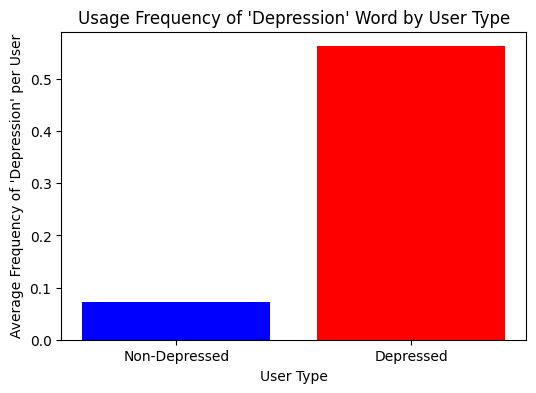

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(["Non-Depressed", "Depressed"], average_frequency, color=["blue", "red"])
plt.xlabel("User Type")
plt.ylabel("Average Frequency of 'Depression' per User")
plt.title("Usage Frequency of 'Depression' Word by User Type")
plt.show()

In [ ]:
non_depressed_avg = average_frequency.get(0, 0)  # Assuming label 0 = Non-Depressed
depressed_avg = average_frequency.get(1, 0)      # Assuming label 1 = Depressed

print(f"Average frequency of 'depression' for Non-Depressed users: {non_depressed_avg}")
print(f"Average frequency of 'depression' for Depressed users: {depressed_avg}")

Average frequency of 'depression' for Non-Depressed users: 0.07275040481147352
Average frequency of 'depression' for Depressed users: 0.5628107825176656


In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec

In [ ]:
sentences = dataset["processed_messages"].tolist()

In [ ]:
#word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, sg=1)   This I did for Word2Vec Model training , now I have it so dont need again

In [ ]:
#word2vec_model.save("word2vec_model.bin")

In [ ]:
word2vec_model = Word2Vec.load("word2vec_model.bin")

In [ ]:
word = "depression"
if word in word2vec_model.wv:
    print(f"Vector for '{word}':\n", word2vec_model.wv[word])
else:
    print(f"'{word}' not found in vocabulary.")

Vector for 'depression':
 [ 2.91618407e-01  2.55251110e-01  2.14076247e-02 -6.91939220e-02
 -1.68688402e-01 -9.08752143e-01  3.48178059e-01  3.67704004e-01
  1.09663673e-01  1.47878841e-01  3.20883244e-01 -3.41840833e-01
 -5.85987091e-01  6.40972972e-01 -1.01329692e-01 -5.74610233e-01
  6.23833656e-01 -2.30133548e-01  1.99582651e-01 -7.72598386e-01
 -7.81732649e-02 -3.62747014e-02  4.91279572e-01  1.26104340e-01
 -4.51744758e-02 -1.25897124e-01 -2.19189018e-01 -1.02758706e-01
 -8.61939371e-01 -2.05631286e-01  6.66708589e-01  1.33005887e-01
 -7.39410877e-01  1.89162064e-02  3.96694429e-02  3.30122769e-01
  2.31362388e-01 -3.08191091e-01 -1.43872425e-01 -7.43380070e-01
 -1.80567746e-04 -7.99583256e-01  3.08514208e-01 -2.57453442e-01
  2.45216832e-01  4.78377432e-01 -1.82729632e-01  2.37261966e-01
 -4.54435982e-02  3.33057076e-01  3.26602846e-01 -6.94619834e-01
 -5.97105980e-01  5.94541850e-03 -6.71442568e-01  3.76910508e-01
  1.45987247e-03 -3.46272409e-01 -2.76703835e-01  2.08248854e-01

In [ ]:
print(word2vec_model.wv.most_similar("depression", topn=5))

[('depressive', 0.7826259136199951), ('adhd', 0.772055983543396), ('bipolar', 0.7678179144859314), ('addiction', 0.7625836133956909), ('anxiety', 0.7595044374465942)]


In [ ]:
def get_word_embeddings(words):
    return [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]

In [ ]:
dataset["word_embeddings"] = dataset["processed_messages"].apply(get_word_embeddings)

In [ ]:
dataset.head()

,message to examine,label (depression result),processed_messages,processed_messages_str,POS_tags,NOUN,PRON,ADV,ADJ,VERB,Total Words,Total Sentences,Words per Sentence,tfidf_values,depression_word_count,word_embeddings
0,just had a real good moment i missssssssss him...,0,"[real, good, moment, missssssssss, much]",real good moment missssssssss much,"[(real, ADV), (good, ADJ), (moment, NOUN), (mi...",0.200000,0.000000,0.4,0.2,0.200000,5,1,5.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[[0.2268835, 0.46518308, -0.23322055, -0.15338..."
1,is reading manga,0,"[reading, manga]",reading manga,"[(reading, VERB), (manga, ADV)]",0.000000,0.000000,0.5,0.0,0.500000,2,1,2.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[[0.37760437, 0.5379552, -0.3572067, -0.142228..."
2,comeagainjen,0,[comeagainjen],comeagainjen,"[(comeagainjen, NOUN)]",1.000000,0.000000,0.0,0.0,0.000000,1,1,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[[0.025454173, 0.08087213, 0.01570832, 0.01579..."
3,lapcat need to send em to my accountant tomorr...,0,"[lapcat, need, send, em, accountant, tomorrow,...",lapcat need send em accountant tomorrow oddly ...,"[(lapcat, NOUN), (need, NOUN), (send, VERB), (...",0.400000,0.066667,0.2,0.0,0.200000,15,1,14.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[[0.012106739, 0.029459462, 0.0018408787, -0.0..."
4,add me on myspace myspacecomlookthunder,0,"[add, myspace, myspacecomlookthunder]",add myspace myspacecomlookthunder,"[(add, VERB), (myspace, NOUN), (myspacecomlook...",0.666667,0.000000,0.0,0.0,0.333333,3,1,3.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[[0.38006794, 0.49148747, -0.08017502, 0.22516..."


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

def process_word_embedding_feature(df, batch_size=5000, max_seq_length=300, save_path="embeddings_matrix.npy"):
    embeddings_list = []

    for start in range(0, len(df), batch_size):
        batch = df.iloc[start:start+batch_size]  # Process in chunks

        # Convert word embeddings to NumPy arrays
        batch_embeddings = batch['word_embeddings'].apply(lambda x: np.array(x, dtype=np.float32))

        # Pad/truncate embeddings
        padded_embeddings = pad_sequences(batch_embeddings.tolist(),
                                          maxlen=max_seq_length,
                                          padding='post',
                                          truncating='post',
                                          dtype='float32')

        embeddings_list.append(padded_embeddings)

    # Convert list to NumPy array and save
    final_embeddings = np.vstack(embeddings_list)
    print(f"Embeddings Matrix Shape: {final_embeddings.shape}")
    np.save(save_path, final_embeddings)

    return final_embeddings

In [ ]:
embeddings_matrix = process_word_embedding_feature(dataset)

Embeddings Matrix Shape: (16288, 300, 100)


In [ ]:
def process_tfidf_in_batches(dataset, batch_size=5000, save_path="tfidf_matrix.npy"):
    """
    Processes TF-IDF values in batches to reduce memory usage.

    Parameters:
        dataset (pd.DataFrame): DataFrame containing the 'tfidf_values' column.
        batch_size (int): Number of rows to process per batch.
        save_path (str): File path to save the final NumPy array.

    Returns:
        None (saves the final TF-IDF matrix)
    """

    tfidf_list = []

    for start in range(0, len(dataset), batch_size):
        batch = dataset.iloc[start:start + batch_size]  # Get batch

        # Convert to NumPy array
        batch_tfidf = batch['tfidf_values'].apply(lambda x: np.array(x, dtype=np.float32))

        # Stack them properly
        batch_tfidf_matrix = np.stack(batch_tfidf.to_numpy())

        # Append to list
        tfidf_list.append(batch_tfidf_matrix)

        print(f"✅ Processed batch {start // batch_size + 1} | Shape: {batch_tfidf_matrix.shape}")

    # Convert list to final NumPy array
    final_tfidf_matrix = np.vstack(tfidf_list)

    # Save the processed matrix
    np.save(save_path, final_tfidf_matrix)

    print(f"\n✅ Final TF-IDF Matrix Shape: {final_tfidf_matrix.shape}")

    return final_tfidf_matrix

In [ ]:
tfidf_matrix = process_tfidf_in_batches(dataset)

✅ Processed batch 1 | Shape: (5000, 8805)
✅ Processed batch 2 | Shape: (5000, 8805)
✅ Processed batch 3 | Shape: (5000, 8805)
✅ Processed batch 4 | Shape: (1288, 8805)

✅ Final TF-IDF Matrix Shape: (16288, 8805)


In [ ]:
feature_columns = ['Total Words', 'Total Sentences', 'Words per Sentence',
                       'NOUN', 'PRON', 'ADV', 'ADJ', 'VERB']

In [ ]:
basic_features = dataset[feature_columns].values
basic_features = np.array(basic_features, dtype=np.float32)

In [ ]:
np.save('basic_features.npy', basic_features)

In [ ]:
labels = dataset['label (depression result)'].values

In [ ]:
print(f"Basic Features Shape: {basic_features.shape}")

Basic Features Shape: (16288, 8)


In [ ]:
print(f"✅Embeddings Matrix Shape: {embeddings_matrix.shape}")
print(f"✅TF-IDF Matrix Shape: {tfidf_matrix.shape}")
print(f"✅Basic Features Shape: {basic_features.shape}")

✅Embeddings Matrix Shape: (16288, 300, 100)
✅TF-IDF Matrix Shape: (16288, 8805)
✅Basic Features Shape: (16288, 8)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_emb, X_temp_emb, X_train_tfidf, X_temp_tfidf, X_train_basic, X_temp_basic, y_train, y_temp = train_test_split(
    embeddings_matrix, tfidf_matrix, basic_features, labels, test_size=0.2, random_state=42
)

In [ ]:
X_val_emb, X_test_emb, X_val_tfidf, X_test_tfidf, X_val_basic, X_test_basic, y_val, y_test = train_test_split(
    X_temp_emb, X_temp_tfidf, X_temp_basic, y_temp, test_size=0.5, random_state=42
)

In [ ]:
# Print shapes to verify
print(f"✅ Train Set: {X_train_emb.shape}, {X_train_tfidf.shape}, {X_train_basic.shape}, Labels: {y_train.shape}")
print(f"✅ Validation Set: {X_val_emb.shape}, {X_val_tfidf.shape}, {X_val_basic.shape}, Labels: {y_val.shape}")
print(f"✅ Test Set: {X_test_emb.shape}, {X_test_tfidf.shape}, {X_test_basic.shape}, Labels: {y_test.shape}")

✅ Train Set: (13030, 300, 100), (13030, 8805), (13030, 8), Labels: (13030,)
✅ Validation Set: (1629, 300, 100), (1629, 8805), (1629, 8), Labels: (1629,)
✅ Test Set: (1629, 300, 100), (1629, 8805), (1629, 8), Labels: (1629,)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, Dropout

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, Dropout

def build_lstm_model(max_seq_length, embedding_dim, basic_feature_dim, tfidf_dim):

    # LSTM Input (Word Embeddings)
    embedding_input = Input(shape=(max_seq_length, embedding_dim), name="Embedding_Input")
    lstm_out = LSTM(128, return_sequences=False, name="LSTM_Layer")(embedding_input)

    # Other Features Input
    basic_input = Input(shape=(basic_feature_dim,), name="Basic_Features_Input")
    tfidf_input = Input(shape=(tfidf_dim,), name="TFIDF_Input")

    # Merge All Features
    merged = Concatenate(name="Concatenated_Features")([lstm_out, basic_input, tfidf_input])
    merged = Dropout(0.3)(merged)  # Prevent overfitting
    output = Dense(1, activation='sigmoid', name="Output_Layer")(merged)

    model = Model(inputs=[embedding_input, basic_input, tfidf_input], outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    print("✅ Model built successfully!")
    model.summary()

    return model

In [ ]:
model = build_lstm_model(max_seq_length=300, embedding_dim=100, basic_feature_dim=8, tfidf_dim=8805)

✅ Model built successfully!


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Embedding_Input           │ (None, 300, 100)       │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ LSTM_Layer (LSTM)         │ (None, 128)            │        117,248 │ Embedding_Input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Basic_Features_Input      │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ TFIDF_Input (InputLayer)  │ (None, 8805)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Concatenated_Features     │ (None, 8941)           │              0 │ LSTM_Layer[0][0],      │
│ (Concatenate)             │                        │                │ Basic_Features_Input[… │
│                           │                        │                │ TFIDF_Input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 8941)           │              0 │ Concatenated_Features… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Output_Layer (Dense)      │ (None, 1)              │          8,942 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 126,190 (492.93 KB)

 Trainable params: 126,190 (492.93 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_lstm_model.h5", monitor='val_loss', save_best_only=True)

In [ ]:
history = model.fit(
    [X_train_emb, X_train_basic, X_train_tfidf], y_train,
    validation_data=([X_val_emb, X_val_basic,X_val_tfidf], y_val),
    batch_size=64,
    epochs=100,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.6585 - loss: 0.6396

204/204 ━━━━━━━━━━━━━━━━━━━━ 71s 337ms/step - accuracy: 0.6586 - loss: 0.6396 - val_accuracy: 0.7520 - val_loss: 0.5703
Epoch 2/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.7290 - loss: 0.5929

204/204 ━━━━━━━━━━━━━━━━━━━━ 67s 330ms/step - accuracy: 0.7290 - loss: 0.5930 - val_accuracy: 0.7029 - val_loss: 0.5582
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.7435 - loss: 0.5796

204/204 ━━━━━━━━━━━━━━━━━━━━ 84s 341ms/step - accuracy: 0.7436 - loss: 0.5795 - val_accuracy: 0.7864 - val_loss: 0.5240
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.7777 - loss: 0.5432

204/204 ━━━━━━━━━━━━━━━━━━━━ 84s 351ms/step - accuracy: 0.7778 - loss: 0.5432 - val_accuracy: 0.8453 - val_loss: 0.5128
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.8203 - loss: 0.5229

204/204 ━━━━━━━━━━━━━━━━━━━━ 81s 345ms/step - accuracy: 0.8203 - loss: 0.5229 - val_accuracy: 0.8226 - val_loss: 0.4908
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.8201 - loss: 0.5123

204/204 ━━━━━━━━━━━━━━━━━━━━ 81s 342ms/step - accuracy: 0.8201 - loss: 0.5123 - val_accuracy: 0.8115 - val_loss: 0.4838
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.8327 - loss: 0.4863

204/204 ━━━━━━━━━━━━━━━━━━━━ 83s 346ms/step - accuracy: 0.8327 - loss: 0.4863 - val_accuracy: 0.8281 - val_loss: 0.4659
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.8368 - loss: 0.4717

204/204 ━━━━━━━━━━━━━━━━━━━━ 72s 351ms/step - accuracy: 0.8368 - loss: 0.4717 - val_accuracy: 0.8662 - val_loss: 0.4601
Epoch 9/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.8519 - loss: 0.4632

204/204 ━━━━━━━━━━━━━━━━━━━━ 81s 346ms/step - accuracy: 0.8519 - loss: 0.4632 - val_accuracy: 0.8711 - val_loss: 0.4421
Epoch 10/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.8550 - loss: 0.4473

204/204 ━━━━━━━━━━━━━━━━━━━━ 82s 347ms/step - accuracy: 0.8550 - loss: 0.4473 - val_accuracy: 0.8607 - val_loss: 0.4335
Epoch 11/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.8632 - loss: 0.4394

204/204 ━━━━━━━━━━━━━━━━━━━━ 82s 347ms/step - accuracy: 0.8632 - loss: 0.4394 - val_accuracy: 0.8766 - val_loss: 0.4238
Epoch 12/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.8687 - loss: 0.4293

204/204 ━━━━━━━━━━━━━━━━━━━━ 80s 338ms/step - accuracy: 0.8687 - loss: 0.4293 - val_accuracy: 0.8699 - val_loss: 0.4142
Epoch 13/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.8710 - loss: 0.4159

204/204 ━━━━━━━━━━━━━━━━━━━━ 71s 347ms/step - accuracy: 0.8710 - loss: 0.4159 - val_accuracy: 0.8766 - val_loss: 0.4080
Epoch 14/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.8715 - loss: 0.4115

204/204 ━━━━━━━━━━━━━━━━━━━━ 71s 348ms/step - accuracy: 0.8715 - loss: 0.4115 - val_accuracy: 0.8760 - val_loss: 0.3981
Epoch 15/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.8755 - loss: 0.3971

204/204 ━━━━━━━━━━━━━━━━━━━━ 81s 344ms/step - accuracy: 0.8755 - loss: 0.3971 - val_accuracy: 0.8840 - val_loss: 0.3917
Epoch 16/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.8774 - loss: 0.3931

204/204 ━━━━━━━━━━━━━━━━━━━━ 83s 351ms/step - accuracy: 0.8774 - loss: 0.3931 - val_accuracy: 0.8846 - val_loss: 0.3815
Epoch 17/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.8789 - loss: 0.3924

204/204 ━━━━━━━━━━━━━━━━━━━━ 81s 346ms/step - accuracy: 0.8789 - loss: 0.3923 - val_accuracy: 0.8932 - val_loss: 0.3772
Epoch 18/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.8847 - loss: 0.3787

204/204 ━━━━━━━━━━━━━━━━━━━━ 82s 347ms/step - accuracy: 0.8847 - loss: 0.3787 - val_accuracy: 0.8932 - val_loss: 0.3712
Epoch 19/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.8867 - loss: 0.3723

204/204 ━━━━━━━━━━━━━━━━━━━━ 71s 346ms/step - accuracy: 0.8867 - loss: 0.3723 - val_accuracy: 0.9079 - val_loss: 0.3675
Epoch 20/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.8903 - loss: 0.3730

204/204 ━━━━━━━━━━━━━━━━━━━━ 82s 348ms/step - accuracy: 0.8903 - loss: 0.3730 - val_accuracy: 0.9116 - val_loss: 0.3632
Epoch 21/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.8954 - loss: 0.3567

204/204 ━━━━━━━━━━━━━━━━━━━━ 82s 349ms/step - accuracy: 0.8954 - loss: 0.3567 - val_accuracy: 0.9036 - val_loss: 0.3593
Epoch 22/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.8906 - loss: 0.3576

204/204 ━━━━━━━━━━━━━━━━━━━━ 82s 349ms/step - accuracy: 0.8906 - loss: 0.3576 - val_accuracy: 0.9091 - val_loss: 0.3524
Epoch 23/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 81s 343ms/step - accuracy: 0.8914 - loss: 0.3581 - val_accuracy: 0.8858 - val_loss: 0.3538
Epoch 24/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.8977 - loss: 0.3476

204/204 ━━━━━━━━━━━━━━━━━━━━ 80s 334ms/step - accuracy: 0.8977 - loss: 0.3476 - val_accuracy: 0.9085 - val_loss: 0.3446
Epoch 25/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.9012 - loss: 0.3364

204/204 ━━━━━━━━━━━━━━━━━━━━ 84s 345ms/step - accuracy: 0.9011 - loss: 0.3364 - val_accuracy: 0.9061 - val_loss: 0.3431
Epoch 26/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.9050 - loss: 0.3362

204/204 ━━━━━━━━━━━━━━━━━━━━ 82s 345ms/step - accuracy: 0.9050 - loss: 0.3362 - val_accuracy: 0.9018 - val_loss: 0.3370
Epoch 27/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.9008 - loss: 0.3303

204/204 ━━━━━━━━━━━━━━━━━━━━ 71s 346ms/step - accuracy: 0.9008 - loss: 0.3303 - val_accuracy: 0.9085 - val_loss: 0.3359
Epoch 28/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.9046 - loss: 0.3259

204/204 ━━━━━━━━━━━━━━━━━━━━ 82s 345ms/step - accuracy: 0.9045 - loss: 0.3259 - val_accuracy: 0.9006 - val_loss: 0.3286
Epoch 29/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 82s 344ms/step - accuracy: 0.8952 - loss: 0.3279 - val_accuracy: 0.8969 - val_loss: 0.3367
Epoch 30/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.8999 - loss: 0.3259

204/204 ━━━━━━━━━━━━━━━━━━━━ 71s 346ms/step - accuracy: 0.8999 - loss: 0.3259 - val_accuracy: 0.9141 - val_loss: 0.3262
Epoch 31/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.8990 - loss: 0.3233

204/204 ━━━━━━━━━━━━━━━━━━━━ 82s 347ms/step - accuracy: 0.8990 - loss: 0.3232 - val_accuracy: 0.9220 - val_loss: 0.3238
Epoch 32/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.9039 - loss: 0.3150

204/204 ━━━━━━━━━━━━━━━━━━━━ 72s 353ms/step - accuracy: 0.9039 - loss: 0.3150 - val_accuracy: 0.9165 - val_loss: 0.3188
Epoch 33/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 83s 356ms/step - accuracy: 0.9119 - loss: 0.3074 - val_accuracy: 0.9165 - val_loss: 0.3199
Epoch 34/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.9094 - loss: 0.3014

204/204 ━━━━━━━━━━━━━━━━━━━━ 81s 352ms/step - accuracy: 0.9094 - loss: 0.3015 - val_accuracy: 0.9159 - val_loss: 0.3122
Epoch 35/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.9076 - loss: 0.3007

204/204 ━━━━━━━━━━━━━━━━━━━━ 83s 355ms/step - accuracy: 0.9076 - loss: 0.3007 - val_accuracy: 0.9220 - val_loss: 0.3110
Epoch 36/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 80s 345ms/step - accuracy: 0.9087 - loss: 0.2992 - val_accuracy: 0.9190 - val_loss: 0.3152
Epoch 37/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.9063 - loss: 0.3066

204/204 ━━━━━━━━━━━━━━━━━━━━ 84s 355ms/step - accuracy: 0.9063 - loss: 0.3065 - val_accuracy: 0.9202 - val_loss: 0.3107
Epoch 38/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.9076 - loss: 0.3009

204/204 ━━━━━━━━━━━━━━━━━━━━ 80s 345ms/step - accuracy: 0.9076 - loss: 0.3009 - val_accuracy: 0.9276 - val_loss: 0.3071
Epoch 39/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.9122 - loss: 0.2898

204/204 ━━━━━━━━━━━━━━━━━━━━ 84s 353ms/step - accuracy: 0.9122 - loss: 0.2898 - val_accuracy: 0.9257 - val_loss: 0.3065
Epoch 40/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 72s 352ms/step - accuracy: 0.9109 - loss: 0.2946 - val_accuracy: 0.9196 - val_loss: 0.3085
Epoch 41/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.9089 - loss: 0.2951

204/204 ━━━━━━━━━━━━━━━━━━━━ 71s 349ms/step - accuracy: 0.9089 - loss: 0.2951 - val_accuracy: 0.9233 - val_loss: 0.3058
Epoch 42/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.9100 - loss: 0.2910

204/204 ━━━━━━━━━━━━━━━━━━━━ 71s 349ms/step - accuracy: 0.9100 - loss: 0.2910 - val_accuracy: 0.9276 - val_loss: 0.3025
Epoch 43/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.9154 - loss: 0.2890

204/204 ━━━━━━━━━━━━━━━━━━━━ 82s 351ms/step - accuracy: 0.9154 - loss: 0.2890 - val_accuracy: 0.9245 - val_loss: 0.2958
Epoch 44/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 82s 353ms/step - accuracy: 0.9074 - loss: 0.2873 - val_accuracy: 0.9233 - val_loss: 0.2970
Epoch 45/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.9156 - loss: 0.2743

204/204 ━━━━━━━━━━━━━━━━━━━━ 80s 344ms/step - accuracy: 0.9156 - loss: 0.2743 - val_accuracy: 0.9257 - val_loss: 0.2958
Epoch 46/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 81s 340ms/step - accuracy: 0.9186 - loss: 0.2692 - val_accuracy: 0.9220 - val_loss: 0.3023
Epoch 47/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.9168 - loss: 0.2733

204/204 ━━━━━━━━━━━━━━━━━━━━ 72s 355ms/step - accuracy: 0.9168 - loss: 0.2734 - val_accuracy: 0.9263 - val_loss: 0.2865
Epoch 48/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 72s 353ms/step - accuracy: 0.9165 - loss: 0.2771 - val_accuracy: 0.9276 - val_loss: 0.2883
Epoch 49/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 70s 341ms/step - accuracy: 0.9156 - loss: 0.2749 - val_accuracy: 0.9282 - val_loss: 0.2900
Epoch 50/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 72s 353ms/step - accuracy: 0.9146 - loss: 0.2797 - val_accuracy: 0.9294 - val_loss: 0.2935


In [ ]:
test_loss, test_acc = model.evaluate([X_test_emb, X_test_basic, X_test_tfidf], y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9004 - loss: 0.3161
Test Accuracy: 0.9067, Test Loss: 0.3141


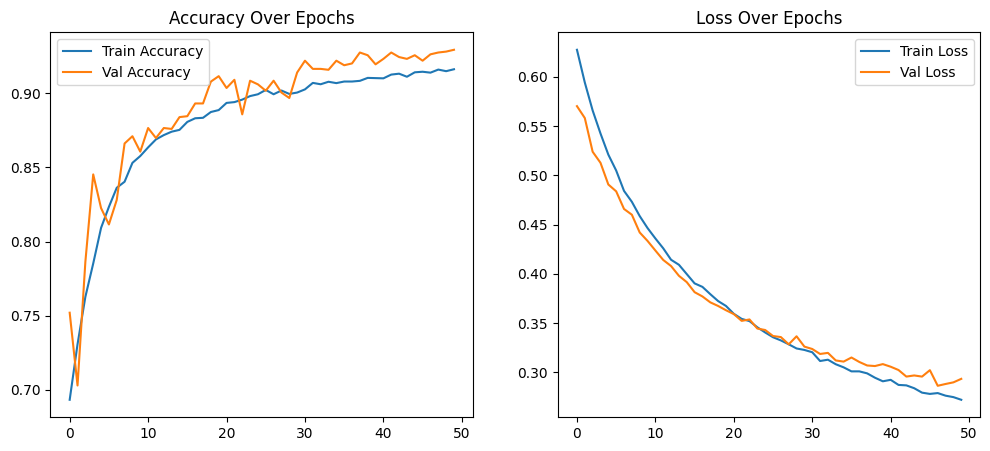

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.show()

In [ ]:
model.save("final_model.keras")

In [ ]:
import pickle
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

In [ ]:
def predict_depression(message):
    # 1. Text Cleaning and Preprocessing
    cleaned_message = cleanText(message)
    tokens = word_tokenize(cleaned_message)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    processed_message = " ".join(tokens)

    # 2. Feature Extraction
    # a. Basic Features
    doc = nlp(processed_message)
    pos_tags = [(token.text, token.pos_) for token in doc]
    morph_features = extract_morph_features(pos_tags)
    word_counts, sentence_counts, words_per_sentence = compute_stylometric_features([processed_message])
    basic_features = np.array([[word_counts[0], sentence_counts[0], words_per_sentence[0],
                               morph_features['NOUN'], morph_features['PRON'], morph_features['ADV'],
                               morph_features['ADJ'], morph_features['VERB']]], dtype=np.float32)

    # b. Word Embeddings
    word_embeddings = get_word_embeddings(tokens)
    padded_embeddings = pad_sequences([word_embeddings], maxlen=300, padding='post', truncating='post', dtype='float32')

    # c. TF-IDF
    tfidf_features = vectorizer.transform([processed_message])
    tfidf_features = tfidf_features.toarray()

    # 3. Prediction
    prediction = model.predict([padded_embeddings, basic_features, tfidf_features])

    return prediction[0][0]  # Return the probability

In [ ]:
message = "I think I should be studying right now"
prediction_probability = predict_depression(message)

# Interpret the prediction
if prediction_probability > 0.5:
    print("The message is predicted as Depressed.")
else:
    print("The message is predicted as Not Depressed.")

print(f"Prediction Probability: {prediction_probability:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
The message is predicted as Not Depressed.
Prediction Probability: 0.2196


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
y_pred_probs = model.predict([X_test_emb, X_test_basic, X_test_tfidf])
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step


In [ ]:
# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a dictionary to store the metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1
}

# Print the metrics in a formatted way
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Accuracy: 0.9067
Precision: 0.9030
Recall: 0.9053
F1-score: 0.9042


In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

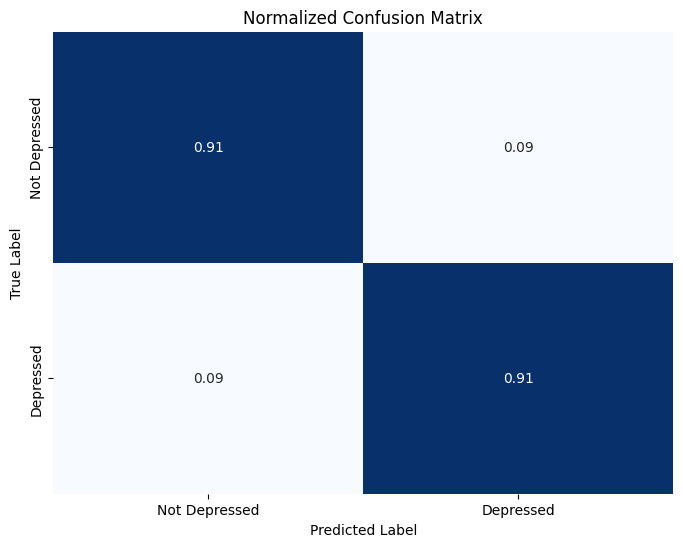

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", cbar=False,
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix")
plt.show()

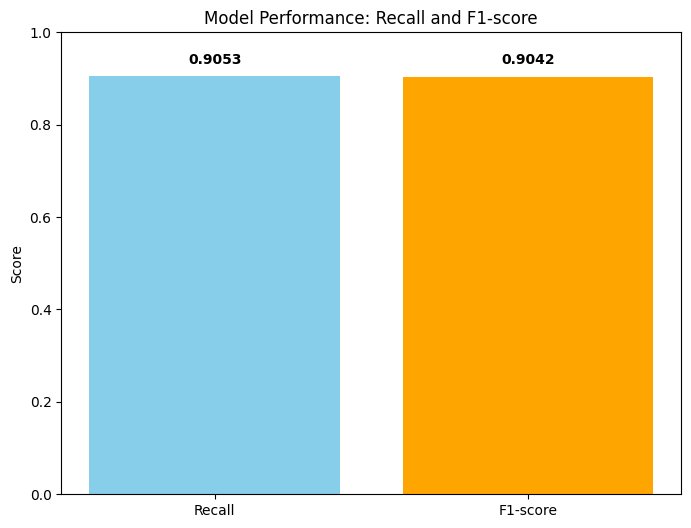

In [ ]:
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-score": f1
}

# Select metrics for plotting
metrics_to_plot = ["Recall", "F1-score,"Precision"]
values = [metrics[metric] for metric in metrics_to_plot]

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics_to_plot, values, color=['skyblue', 'orange'])
plt.title("Model Performance: Recall and F1-score")
plt.ylabel("Score")
plt.ylim(0, 1)  # Set y-axis limits for better visualization

# Add values on top of bars
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', va='bottom', fontweight='bold')

plt.show()